In [1]:
import pandas as pd

# Load the dataset
url = "https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Temperature%20Forecast/temperature.csv?raw=true"
df = pd.read_csv(url)

# Display the first few rows to understand the structure
print(df.head())


   station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat    

In [2]:
# Check the dimensions of the dataset
print("Dimensions of the dataset:", df.shape)

# Check the columns present in the dataset
print("Columns in the dataset:", df.columns)

# Summary statistics
print("Summary statistics:")
print(df.describe())

# Check for missing values
print("Missing values:")
print(df.isnull().sum())


Dimensions of the dataset: (7752, 25)
Columns in the dataset: Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')
Summary statistics:
           station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.963543    84.222862   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   


In [3]:
# Example of handling missing values (if any)
# Replace missing numerical values with mean

# Identify numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Fill missing values with mean for numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


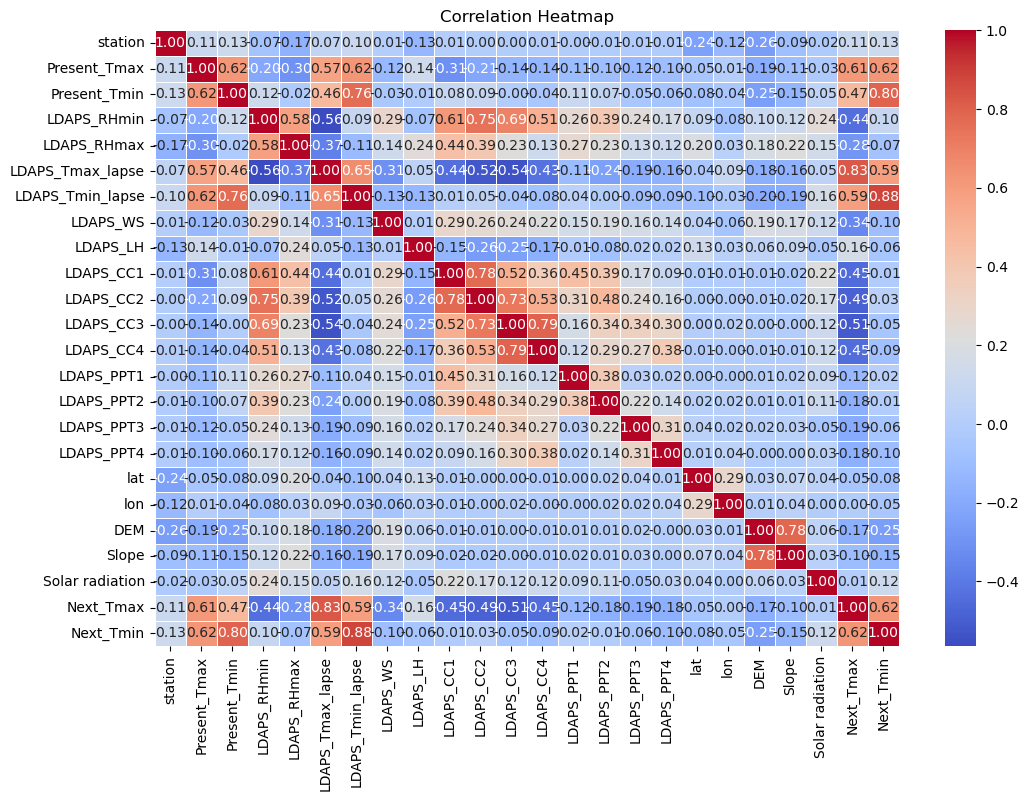

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns only
numeric_cols = df.select_dtypes(include='number')

# Example: Visualizing correlation between features
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [5]:
# Assuming 'df' is your DataFrame after initial preprocessing

# Feature selection - select relevant columns
selected_features = [
    'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse',
    'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2',
    'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3',
    'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation'
]

# Extracting useful information from date
df['Date'] = pd.to_datetime(df['Date'])
df['Day_of_Week'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Selecting features and target variables
X = df[selected_features + ['Day_of_Week', 'Month', 'Year']]
y_next_tmax = df['Next_Tmax']
y_next_tmin = df['Next_Tmin']

# Optional: Normalize or standardize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\shahr\AppData\Local\Temp\ipykernel_20716\2114324908.py:12: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [6]:
from sklearn.model_selection import train_test_split

# Splitting data into train and test sets
X_train, X_test, y_train_next_tmax, y_test_next_tmax = train_test_split(X_scaled, y_next_tmax, test_size=0.2, random_state=42)
X_train, X_test, y_train_next_tmin, y_test_next_tmin = train_test_split(X_scaled, y_next_tmin, test_size=0.2, random_state=42)


In [7]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

# Initialize the imputer with a strategy (mean, median, etc.)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Transform the training and test data
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the model after imputation
rf_next_tmax = RandomForestRegressor(random_state=42)
rf_next_tmin = RandomForestRegressor(random_state=42)

# Train the model on imputed data
rf_next_tmax.fit(X_train_imputed, y_train_next_tmax)
rf_next_tmin.fit(X_train_imputed, y_train_next_tmin)


RandomForestRegressor(random_state=42)

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predictions for next-day max temperature
y_pred_next_tmax = rf_next_tmax.predict(X_test)
mae_next_tmax = mean_absolute_error(y_test_next_tmax, y_pred_next_tmax)
mse_next_tmax = mean_squared_error(y_test_next_tmax, y_pred_next_tmax)

print(f"MAE for Next_Tmax: {mae_next_tmax}")
print(f"MSE for Next_Tmax: {mse_next_tmax}")

# Predictions for next-day min temperature
y_pred_next_tmin = rf_next_tmin.predict(X_test)
mae_next_tmin = mean_absolute_error(y_test_next_tmin, y_pred_next_tmin)
mse_next_tmin = mean_squared_error(y_test_next_tmin, y_pred_next_tmin)

print(f"MAE for Next_Tmin: {mae_next_tmin}")
print(f"MSE for Next_Tmin: {mse_next_tmin}")


MAE for Next_Tmax: 0.6864701929436892
MSE for Next_Tmax: 0.8379568173323564
MAE for Next_Tmin: 0.5600504661571301
MSE for Next_Tmin: 0.558838523342372


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import numpy as np

# Step 1: Handle NaN values in X_train and y_train
# Example: Impute NaN values with mean
imputer_X = SimpleImputer(strategy='mean')
imputer_y = SimpleImputer(strategy='mean')

X_train_imputed = imputer_X.fit_transform(X_train)
y_train_next_tmax_imputed = imputer_y.fit_transform(y_train_next_tmax.values.reshape(-1, 1)).ravel()
y_train_next_tmin_imputed = imputer_y.transform(y_train_next_tmin.values.reshape(-1, 1)).ravel()

# Step 2: Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Step 3: Initialize GridSearchCV for both targets
grid_search_next_tmax = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search_next_tmin = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Step 4: Perform GridSearchCV with the imputed data
grid_search_next_tmax.fit(X_train_imputed, y_train_next_tmax_imputed)
grid_search_next_tmin.fit(X_train_imputed, y_train_next_tmin_imputed)

# Step 5: Print best parameters found by GridSearchCV
print("Best parameters for Next_Tmax:", grid_search_next_tmax.best_params_)
print("Best parameters for Next_Tmin:", grid_search_next_tmin.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
